# Founding years of selected car manufacturers

This graph was inspired by the following tweet:

https://x.com/stats_feed/status/1709139000257393085?s=20

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np


## Settings

In [2]:
# Add system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

## Data

In [3]:
df = pd.DataFrame.from_dict(
    data = {
        "Tesla": (2003, "US", "North America"),
        "Hyundai": (1967, "KR", "Asia"),
        "Honda": (1948, "JP", "Asia"),
        "Tata Motors": (1945, "IN", "Asia"),
        "KIA": (1944, "KR", "Asia"),
        "Volkswagen": (1937, "DE", "Europe"),
        "Toyota": (1935, "JP", "Asia"),
        "Nissan": (1933, "JP", "Asia"),
        "Mercedes": (1926, "DE", "Europe"),
        "Bentley": (1919, "GB", "Europe"),
        "BMW": (1916, "DE", "Europe"),
        "Chevrolet": (1911, "US", "North America"),
        "Ford": (1903, "US", "North America"),
        "Cadillac": (1902, "US", "North America"),
        "Fiat": (1899, "IT", "Europe"),
        "Renault": (1899, "FR", "Europe")
    },
    orient="index",
    columns=["year", "country", "continent"]
)

df = df.iloc[::-1]
df.reset_index(inplace=True)
df = df.rename(
    columns={
        "index": "brand"
    }
)
df

,brand,year,country,continent
0,Renault,1899,FR,Europe
1,Fiat,1899,IT,Europe
2,Cadillac,1902,US,North America
3,Ford,1903,US,North America
4,Chevrolet,1911,US,North America
5,BMW,1916,DE,Europe
6,Bentley,1919,GB,Europe
7,Mercedes,1926,DE,Europe
8,Nissan,1933,JP,Asia
9,Toyota,1935,JP,Asia


In [4]:
df["continent"].value_counts()

continent
Europe           6
Asia             6
North America    4
Name: count, dtype: int64

In [5]:
grouped = df.groupby(
    by=["continent"]
)

In [6]:
for name, group in grouped:
    print(name)
    print(group)
    print("\n")

('Asia',)
          brand  year country continent
8        Nissan  1933      JP      Asia
9        Toyota  1935      JP      Asia
11          KIA  1944      KR      Asia
12  Tata Motors  1945      IN      Asia
13        Honda  1948      JP      Asia
14      Hyundai  1967      KR      Asia


('Europe',)
         brand  year country continent
0      Renault  1899      FR    Europe
1         Fiat  1899      IT    Europe
5          BMW  1916      DE    Europe
6      Bentley  1919      GB    Europe
7     Mercedes  1926      DE    Europe
10  Volkswagen  1937      DE    Europe


('North America',)
        brand  year country      continent
2    Cadillac  1902      US  North America
3        Ford  1903      US  North America
4   Chevrolet  1911      US  North America
15      Tesla  2003      US  North America




## Plot

### Parameters

In [7]:
mosaic= """
    A
    A
    B
"""

colours = iter(
    [
        "#c061cb",  # purple
        "#33d17a",  # green
        "#1a5fb4",  # blue
    ]
)

marker_size_val = 8
fontsize_labels_small = 14
fontsize_labels_mid = 16

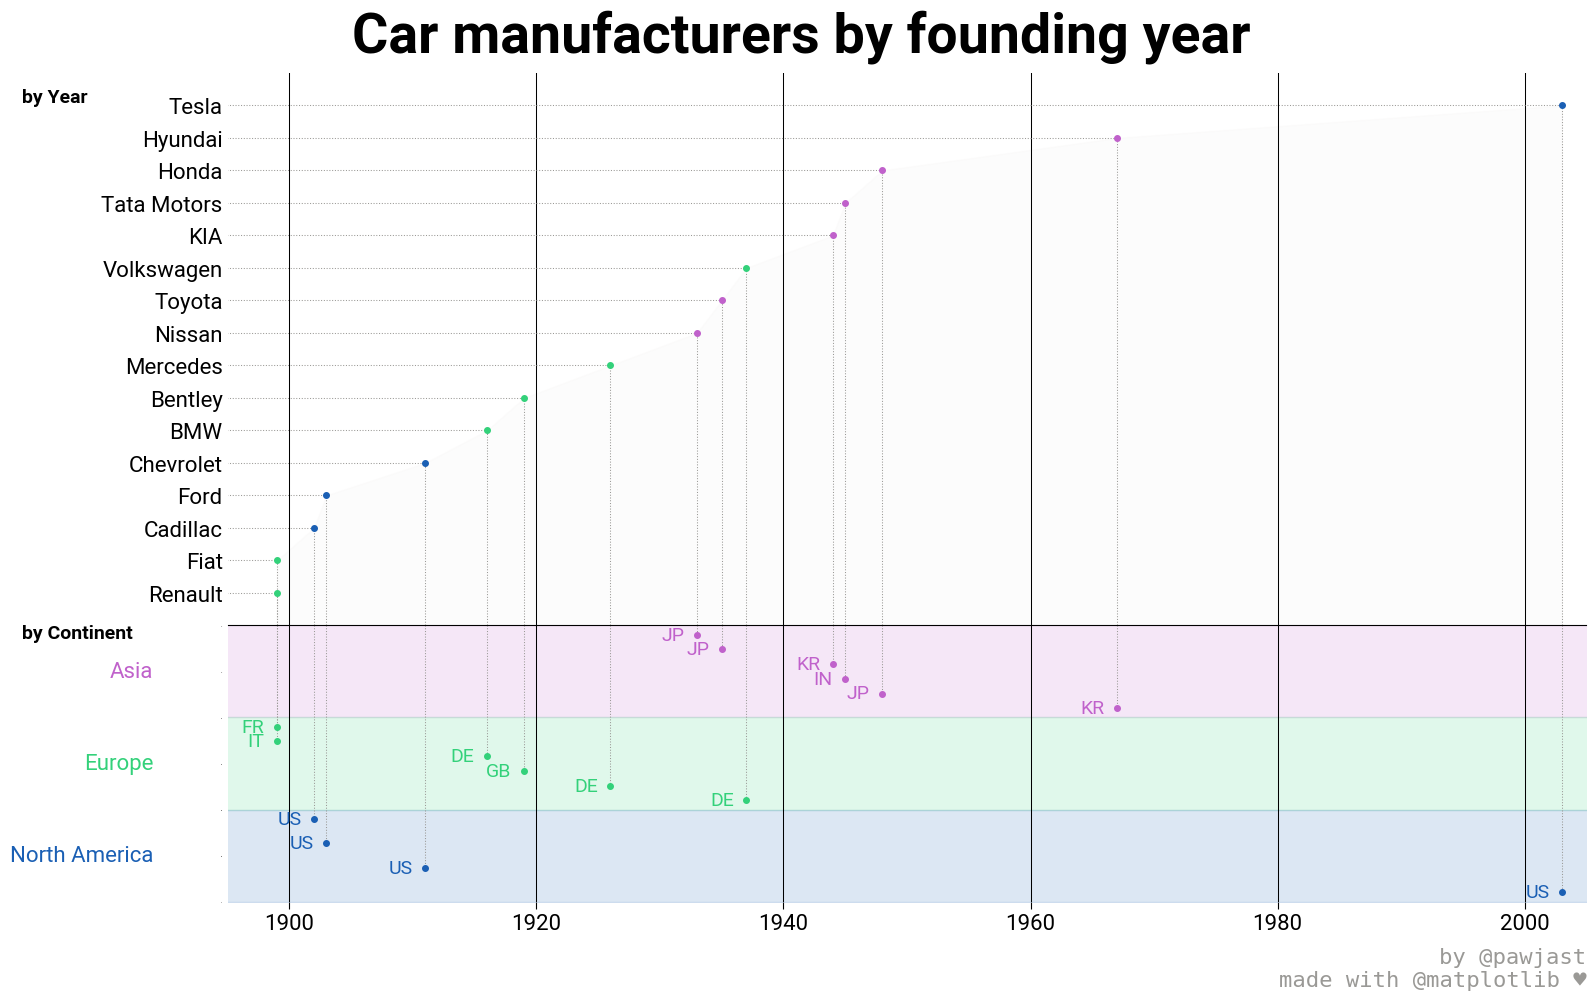

In [8]:
# You need to have `Roboto` font installed on you computer
# Get it from fonts.google.com
with plt.rc_context({'font.family': "Roboto"}):
    fig, axs = plt.subplot_mosaic(
        mosaic=mosaic,
        figsize=(16, 10),
        facecolor="white",
        sharex=True
    )
    fig.suptitle(
        "Car manufacturers by founding year",
        fontsize=40,
        weight="bold"
    )

    axs["A"].set_xlim(1895, 2005)
    axs["A"].set_ylim(-1, len(df))
    axs["A"].set_yticks(range(0, len(df)))
    axs["A"].set_yticklabels(df["brand"])
    axs["A"].set_ylabel(
        "by Year",
        fontsize=fontsize_labels_small,
        rotation=0,
        y=.94,
        ha="right",
        weight="bold",
        labelpad=10
    )

    axs["B"].set_ylim(0, 3)
    axs["B"].set_ylabel(
        "by Continent",
        fontsize=fontsize_labels_small,
        rotation=0,
        y=.94,
        ha="right",
        weight="bold",
        labelpad=63
    )
    axs["B"].invert_yaxis()

    # Create a shading under the top plot
    axs["A"].fill_between(
        x=df["year"],
        y1=-1,
        y2=df.index,
        color="#f6f5f4",
        alpha=.25
    )

    for (continent, group), base in zip(grouped, range(len(grouped))):
        colour = next(colours)

        # --- TOP PLOT ---
        axs["A"].vlines(
            x=group["year"],
            ymin=-1,
            ymax=group.index,
            lw=0.75,
            color="#9a9996",
            linestyles="dotted"
        )
        axs["A"].hlines(
            y=group.index,
            xmin=1890,
            xmax=group["year"],
            lw=0.75,
            color="#9a9996",
            linestyles="dotted"
        )
        axs["A"].plot(
            group["year"],
            group.index,
            marker=".",
            markersize=marker_size_val,
            lw=0,
            color=colour
        )

        # --- BOTTOM PLOT ---
        # Creates pacing of the countries withing group (by Continent)
        # Asia: [0, 1)
        # Europe: [1, 2)
        # North America: [2, 3)
        spacing = np.linspace(base+0.1, base+0.9, len(group))

        axs["B"].vlines(
            x=group["year"],
            ymin=0,
            ymax=spacing,
            lw=0.75,
            color="#9a9996",
            linestyles="dotted"
        )
        axs["B"].plot(
            group["year"],
            spacing,
            marker=".",
            markersize=marker_size_val,
            lw=0,
            color=colour
        )
        axs["B"].fill_between(
            x=(1890, 2010),
            y1=base,
            y2=base+1,
            color=colour,
            alpha=0.15
        )
        
        # Add country labels
        for row, space in zip(group.iterrows(), spacing):
            axs["B"].text(
                x=row[1]["year"]-1,
                y=space,
                s=row[1]["country"],
                ha="right",
                va="center",
                fontsize=fontsize_labels_small,
                color=colour
            )

        # Add name of the continents
        axs["B"].text(
            x=1889,
            y=base + 0.5,
            s=continent[0],
            ha="right",
            va="center",
            color=colour,
            fontsize=fontsize_labels_mid
        )

    axs["A"].tick_params(
        axis="y",
        length=0,
        labelsize=fontsize_labels_mid
    )
    axs["B"].tick_params(
        axis="y",
        length=0,
        labelsize=0
    )
    axs["B"].tick_params(
        axis="x",
        length=5,
        color="black",
        labelsize=fontsize_labels_mid
    )

    # Remove spines
    for position in ["left", "top", "right", "bottom"]:
        if position == "top":
            axs["B"].spines[position].set_visible(True)
        else:
            axs["B"].spines[position].set_visible(False)
        axs["A"].spines[position].set_visible(False)

    # Add grid
    for ax in axs:
        axs[ax].grid(
            axis="x",
            color="black",
            lw=0.75
        )

    # Footer
    axs["B"].text(
        1, -0.32,
        "by @pawjast\nmade with @matplotlib \u2665",
        transform = axs["B"].transAxes,
        horizontalalignment="right",
        verticalalignment="bottom",
        color="#9a9996",
        fontsize=16,
        family="monospace",
        weight="medium"
    )

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)

    # plt.savefig(
    #     fname="pawjast.png",
    #     format="png",
    #     dpi=125,
    # );

plt.show()
